In [6]:
from prepared_data.get_prepared_data import get_prepared_data
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from prepared_data.prepared_test_results import result_predict_prob_to_dataFrame, not_duplicate_elements_in_dataframes
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [2]:
train_org = pd.read_csv('data/train.csv')
train, league_mean_ratting_all, teams_ratting_all = get_prepared_data(train_org)
teams_ratting_all

/home/andrzej/PycharmProjects/Physionet_Challenge_2021/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


correction col type..
percent of object with nan value:  42.20
remove coach columns..
percent of object with nan value:  18.64
remove object with more that  col 80 empty...
percent of object with nan value:  18.64
remove history columns
number_of_history_matches 8
percent of object with nan value:  15.11
remove all nan data
percent of object with nan value:  15.11


,07 Vestur,1. FC M'gladbach,1. FC Merseburg,1. Maj Ruma,12 de Octubre,1860 München,1860 München II,1860 Rosenheim,1877 Alemdağspor,1880 Wasserburg,...,Wolves,Yafoot,Zhlobin,Älvsjö AIK W,Åland,Åland United W,Çarşambaspor,Épila,Érdi VSE,ÍBU
home_team_history_rating_1,8.247721,4.735950,6.974668,1.461400,4.542867,6.439402,10.189010,4.729081,5.064542,5.528680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
away_team_history_rating_1,7.350362,5.972467,8.583335,6.199050,4.885013,6.937842,5.554950,5.221107,5.156260,7.847170,...,6.212290,2.763339,7.265364,5.319450,8.049517,9.545010,5.111615,5.158081,6.589200,8.078382
home_team_history_rating_2,8.532616,5.355725,8.814662,8.418200,4.806454,6.645256,8.547972,6.101598,5.369217,7.847170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
away_team_history_rating_2,6.908470,4.735950,7.365322,1.461400,4.706100,6.555754,10.189010,4.729081,4.852948,9.701936,...,6.183096,3.138267,4.723370,6.791050,15.266450,8.516831,5.548759,4.480228,4.234285,13.150767
home_team_history_rating_3,8.856112,5.640194,7.341014,6.241900,4.900469,6.584791,3.752905,5.065149,4.913009,9.701936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
away_team_history_rating_3,6.748184,5.355725,8.191349,8.418200,4.714871,6.619288,8.547972,6.101598,4.943627,9.356725,...,6.252702,3.452772,7.576471,6.807008,14.171193,9.446250,5.546972,4.844197,7.339883,10.740400
home_team_history_rating_4,7.934810,8.042094,8.578879,8.027725,4.863077,6.447406,7.416014,6.443605,5.103263,9.356725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
away_team_history_rating_4,9.464661,5.640194,7.796437,6.241900,4.784917,6.645606,3.752905,5.065149,5.249407,10.171836,...,5.282335,3.950805,7.358263,6.831733,10.280550,9.850811,6.028750,5.636585,3.515693,5.005294
home_team_history_rating_5,7.697220,6.610879,7.810133,7.392300,5.200468,6.806721,8.368990,5.604541,5.400142,10.171836,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
away_team_history_rating_5,9.794950,8.042094,8.313656,8.027725,4.645906,6.315494,7.416014,6.443605,4.768613,9.631819,...,4.998855,3.679646,8.715285,5.258270,11.081358,9.447794,5.883482,4.749920,7.423083,5.087044


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished


Best parameter (CV score=0.491):
{'logistic__C': 10000.0, 'pca__n_components': 45}


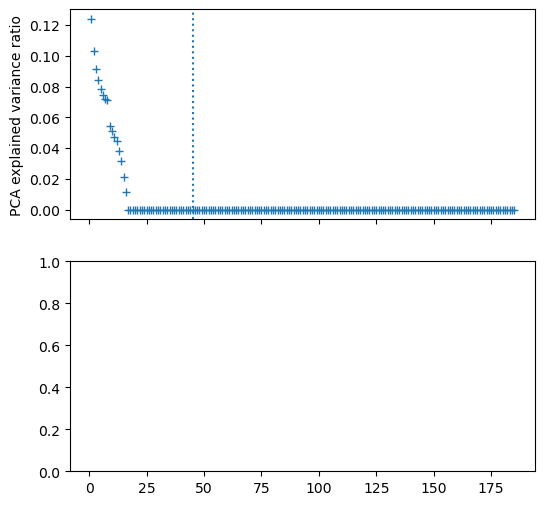

In [6]:


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

# X_digits, y_digits = datasets.load_digits(return_X_y=True)
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60],
    "logistic__C": np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1, verbose=3)
search.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(train.iloc[:, 1:])

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
plt.show()

In [4]:
test_org = pd.read_csv('data/test.csv')
test,_,_ = get_prepared_data(test_org, 8,league_mean_ratting_all, teams_ratting_all)
test

correction col type..
percent of object with nan value:  39.35
remove coach columns..
percent of object with nan value:  13.93
remove object with more that  col 80 empty...
percent of object with nan value:  13.93
remove history columns
number_of_history_matches 8
percent of object with nan value:  11.15
remove all nan data
percent of object with nan value:  11.15


,is_cup,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_is_play_home_1,...,home_team_history_target_7_1.0,away_team_history_target_7_-1.0,away_team_history_target_7_0.0,away_team_history_target_7_1.0,home_team_history_target_8_-1.0,home_team_history_target_8_0.0,home_team_history_target_8_1.0,away_team_history_target_8_-1.0,away_team_history_target_8_0.0,away_team_history_target_8_1.0
id,,,,,,,,,,,,,,,,,,,,,
18217690,1,168,166,1152,72,70,191,98,165,1.0,...,1,1,0,0,1,0,0,0,1,0
18017200,1,98,93,74,93,74,93,74,69,1.0,...,1,0,0,1,0,0,1,0,0,1
18395567,1,101,285,119,74,68,100,69,96,1.0,...,0,0,0,1,0,0,1,0,0,1
18304447,1,72,70,97,94,198,69,74,121,0.0,...,1,0,0,1,0,0,1,0,0,1
18349436,1,98,93,98,71,73,94,98,143,0.0,...,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18109223,0,240,168,119,264,412,625,384,408,0.0,...,0,0,1,0,0,0,1,1,0,0
18148017,0,336,287,264,552,316,600,119,120,1.0,...,0,0,1,0,0,0,1,0,0,1
18125499,0,169,118,0,119,144,0,191,359,0.0,...,0,1,0,0,0,1,0,1,0,0


In [8]:
target = train['target']
X_train_org = train.drop('target', axis=1)
pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=1000, n_jobs=-1))
pipe.fit(X_train_org, target)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, multi_class='ovr', n_jobs=-1,
                                    random_state=0))])

In [9]:
test_result = pipe.predict_proba(test)
test_result = result_predict_prob_to_dataFrame(test_result, test)
test_result

,id,away,draw,home
0,18217690,0.245288,0.179975,0.574737
1,18017200,0.386055,0.227127,0.386818
2,18395567,0.284835,0.213129,0.502036
3,18304447,0.242408,0.197025,0.560567
4,18349436,0.203352,0.174289,0.622359
...,...,...,...,...
55077,18109223,0.182420,0.304840,0.512739
55078,18148017,0.151848,0.313716,0.534436
55079,18125499,0.196707,0.360998,0.442295
55080,18082058,0.419985,0.345197,0.234818


Training for nan value

In [10]:
train_org = pd.read_csv('data/train.csv')
train,_,_ = get_prepared_data(train_org, number_of_history_matches=1)
test_org = pd.read_csv('data/test.csv')
test_history_1,_,_ = get_prepared_data(test_org, number_of_history_matches=1,league_mean_ratting_all=league_mean_ratting_all,teams_mean_ratting_all= teams_ratting_all)
test_history_1 = not_duplicate_elements_in_dataframes(test_history_1.reset_index(), test)
test_history_1

/home/andrzej/PycharmProjects/Physionet_Challenge_2021/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


correction col type..
percent of object with nan value:  42.20
remove coach columns..
percent of object with nan value:  18.64
remove object with more that  col 80 empty...
percent of object with nan value:  18.64
remove history columns
number_of_history_matches 1
percent of object with nan value:  5.62
remove all nan data
percent of object with nan value:  5.62
correction col type..
percent of object with nan value:  39.35
remove coach columns..
percent of object with nan value:  13.93
remove object with more that  col 80 empty...
percent of object with nan value:  13.93
remove history columns
number_of_history_matches 1
percent of object with nan value:  2.99
remove all nan data
percent of object with nan value:  2.99
Number of not duplicate elements  11632


,is_cup,home_team_history_match_date_1,home_team_history_is_play_home_1,home_team_history_is_cup_1,home_team_history_goal_1,home_team_history_opponent_goal_1,home_team_history_rating_1,home_team_history_opponent_rating_1,away_team_history_match_date_1,away_team_history_is_play_home_1,...,away_team_history_gol_difference_1,away_team_mean_regeneration_time,league_id_ratting,sum_history_targets,home_team_history_target_1_-1.0,home_team_history_target_1_0.0,home_team_history_target_1_1.0,away_team_history_target_1_-1.0,away_team_history_target_1_0.0,away_team_history_target_1_1.0
id,,,,,,,,,,,,,,,,,,,,,
18395595,1,72,1.0,0.0,1.0,0.0,10.392432,3.526532,95,1.0,...,3.0,95.0,6.805677,2.0,0,0,1,0,0,1
18395597,1,76,1.0,0.0,2.0,2.0,9.860605,3.190473,77,0.0,...,0.0,77.0,6.805677,0.0,0,1,0,0,1,0
18395534,1,96,0.0,0.0,1.0,2.0,6.489692,4.418742,77,0.0,...,2.0,77.0,6.805677,0.0,1,0,0,0,0,1
18395531,1,388,1.0,0.0,2.0,1.0,11.078400,3.724950,74,0.0,...,3.0,74.0,6.805677,2.0,0,0,1,0,0,1
18395593,1,96,0.0,0.0,6.0,1.0,13.975950,2.460667,94,0.0,...,-1.0,94.0,6.805677,0.0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18430448,1,69,0.0,1.0,2.0,0.0,8.659344,4.388794,72,1.0,...,1.0,72.0,10.655922,2.0,0,0,1,0,0,1
18430452,1,74,0.0,1.0,0.0,1.0,10.878485,6.779631,72,0.0,...,4.0,72.0,10.655922,0.0,1,0,0,0,0,1
18433160,1,78,0.0,0.0,1.0,4.0,5.731083,13.314733,5662,1.0,...,-1.0,5662.0,10.655922,-2.0,1,0,0,1,0,0


In [11]:
target = train['target']
X_train_org = train.drop('target', axis=1)
pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=1000, n_jobs=-1))
pipe.fit(X_train_org, target)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, multi_class='ovr', n_jobs=-1,
                                    random_state=0))])

In [12]:
test_result_history_1 = pipe.predict_proba(test_history_1)
test_result_history_1 = result_predict_prob_to_dataFrame(test_result_history_1, test_history_1)
test_result_history_1

,id,away,draw,home
0,18395595,0.448831,0.220689,0.330480
1,18395597,0.329815,0.221556,0.448629
2,18395534,0.402138,0.225215,0.372647
3,18395531,0.329119,0.215298,0.455583
4,18395593,0.295594,0.187186,0.517220
...,...,...,...,...
11627,18430448,0.523791,0.113240,0.362969
11628,18430452,0.582430,0.111594,0.305976
11629,18433160,0.412768,0.123347,0.463885
11630,18447405,0.338269,0.123438,0.538293


In [13]:
from prepared_data.prepared_test_results import append_test_results

test_result_learn = append_test_results(test_result_history_1, test_result)
test_result_learn

,id,away,draw,home
0,18395595,0.448831,0.220689,0.330480
1,18395597,0.329815,0.221556,0.448629
2,18395534,0.402138,0.225215,0.372647
3,18395531,0.329119,0.215298,0.455583
4,18395593,0.295594,0.187186,0.517220
...,...,...,...,...
66709,18109223,0.182420,0.304840,0.512739
66710,18148017,0.151848,0.313716,0.534436
66711,18125499,0.196707,0.360998,0.442295
66712,18082058,0.419985,0.345197,0.234818


In [16]:
from prepared_data.prepared_test_results import completed_test_result_and_save

result_all = completed_test_result_and_save(test_org, test_result_learn, 'logist_regression_history_8_+_1')
result_all.shape[0]  == test_org.shape[0]


Number of not duplicate elements  5997


True